In [3]:
import numpy as np
import os
import SimpleITK as sitk
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline 

In [4]:
predictions_dir_path = '../predictions'
lists_dir = './lists/lists_cbis_ddsm'

In [5]:
exps = os.listdir(predictions_dir_path)
print(exps)

['TU_CBIS-DDSM224']


In [6]:
exp_name = exps[0]
runs = os.listdir(os.path.join(predictions_dir_path,exp_name))
print(runs)

['TU_pretrain_R50-ViT-B_16_skip3_bs24_224']


In [7]:
saved_images_dir = runs[0]
saved_images_dir = os.path.join(predictions_dir_path,exp_name,saved_images_dir)
print(saved_images_dir)

../predictions\TU_CBIS-DDSM224\TU_pretrain_R50-ViT-B_16_skip3_bs24_224


In [9]:
test_ids_list = open(os.path.join(lists_dir, 'test_vol.txt')).readlines()
test_log = open('test_local.log').readlines()

In [14]:
def search_log(search_term, test_log=test_log):
    for line in test_log:
        if search_term in line:
            arr = line.strip('\n')
            return arr.split()

In [58]:
print(search_log('idx 1'))

['idx', '1', 'case', 'Mass-Test_P_00016_LEFT_MLO', 'mean_dice', '0.738351', 'mean_hd95', '3.162278']


In [62]:
a = search_log('idx 40 ')
a[7]
round(float(a[7]),2)

292.98

In [18]:
def get_pred(idx, test_ids_list=test_ids_list):
    slice_name = test_ids_list[idx].strip('\n')
    img_path = os.path.join(saved_images_dir, slice_name+'_img.nii.gz')
    pred_path = os.path.join(saved_images_dir, slice_name+'_pred.nii.gz')
    gt_path = os.path.join(saved_images_dir, slice_name+'_gt.nii.gz')
    
    img = np.squeeze(sitk.GetArrayFromImage(sitk.ReadImage(img_path)))
    pred = np.squeeze(sitk.GetArrayFromImage(sitk.ReadImage(pred_path)))
    gt = np.squeeze(sitk.GetArrayFromImage(sitk.ReadImage(gt_path)))
    
    return img, gt, pred, slice_name

In [19]:
img, gt, pred, slice_name = get_pred(1)
for i in [img, pred ,gt]:
    print(i.shape)

(512, 512)
(512, 512)
(512, 512)


In [87]:
print(test_log[-1])

Testing performance in best val model: mean_dice : 0.388694 mean_hd95 : 31.083119



In [90]:
def disp_overlay_masks(img, gt, pred, slice_name):
    cmap1 = matplotlib.colors.ListedColormap(['none', 'green'])
    cmap2 = matplotlib.colors.ListedColormap(['none', 'red'])
    
    print(slice_name)
    metrics = search_log(slice_name)
    print(*metrics[0:4], sep=' ')
    print(*metrics[4:], sep=' ')
    
    
    plt.figure(figsize=(7,7))
    plt.title(slice_name + ', dice: ' + str(round(float(metrics[5]),2)) + ', hd: ' + str(round(float(metrics[7]),2)))
    plt.text(0.7, 0.03, 'ground_truth: green\nprediction: red', size=10, transform=plt.gca().transAxes, color='w')
    plt.imshow(img, 'gray', interpolation='none')
    plt.imshow(gt, cmap1, interpolation='none', alpha=0.5)
    plt.imshow(pred, cmap2, interpolation='none', alpha=0.5)
    plt.show()

Mass-Test_P_00147_RIGHT_CC
idx 24 case Mass-Test_P_00147_RIGHT_CC
mean_dice 0.817791 mean_hd95 2.000000


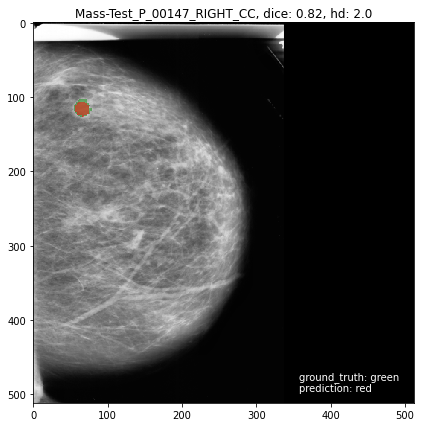

In [98]:
import random

total_ids = len(test_ids_list)

idx = random.randint(0, total_ids-1)

img, gt, pred, slice_name = get_pred(idx)
disp_overlay_masks(img, gt, pred, slice_name)

In [116]:
dices= []
hds = []

for i in range(361):
    metrics = search_log('idx ' + str(i) +' ')
    dices.append(round(float(metrics[5]),2))
    hds.append(round(float(metrics[7]),2))

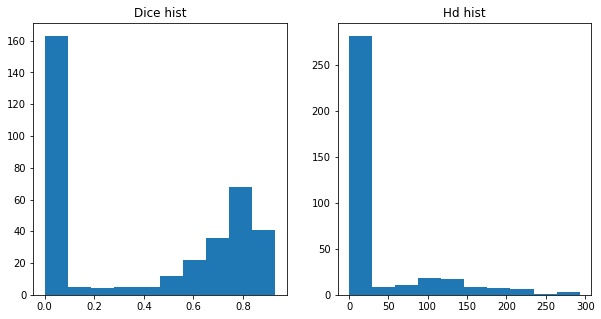

In [128]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Dice hist')
plt.hist(dices)
plt.subplot(1,2,2)
plt.title('Hd hist')
plt.hist(hds)
plt.show()

In [17]:
# cmap1 = matplotlib.colors.ListedColormap(['none', 'green'])
# cmap2 = matplotlib.colors.ListedColormap(['none', 'red'])

# plt.figure(figsize=(12,12))
# plt.subplot(1,2,1)
# plt.title('gt')
# plt.imshow(img, 'gray', interpolation='none')
# plt.imshow(gt, cmap1, interpolation='none', alpha=0.7)
# plt.subplot(1,2,2)
# plt.title('pred')
# plt.imshow(img, 'gray', interpolation='none')
# plt.imshow(pred, cmap2, interpolation='none', alpha=0.7)
# plt.show()